In [69]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
#these all libs we will be requring to perform the required tasks

In [67]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [65]:
users = pd.read_json("users.json")
users.head()
#here the column membership is present which we will be using in the final dataset
#and this is originated from here
#reference to the upcoming question ahead


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [8]:
# Connect to database (will use existing restaurants.db)
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

# Read SQL file
with open("restaurants.sql", "r") as f:
    sql_script = f.read()

# Execute SQL script (creates table + inserts data)
cursor.executescript(sql_script)

conn.commit()
conn.close()

print("restaurants table created successfully!")


restaurants table created successfully!


In [9]:
conn = sqlite3.connect("restaurants.db")
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('restaurants',)]


In [68]:


conn = sqlite3.connect("restaurants.db")

restaurants = pd.read_sql(
    "SELECT * FROM restaurants",
    conn
)

restaurants.head()


,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [60]:
orders_users = pd.merge(
    orders,
    users,
    on="user_id",
    how="left"
)
#here we joined the orders.csv and users.json using user_id column
#---refence to next question ahead

In [66]:
final_df = pd.merge(
    orders_users,
    restaurants,
    on="restaurant_id",
    how="left"
)
#here we used the restaurant_id as a join key to combine orders data with restaurant details
#reference to the upcoming question ahead

In [13]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


In [17]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [18]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

In [19]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])


In [20]:
final_df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,2023-02-18,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,2023-01-18,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,2023-07-15,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,2023-10-04,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,2023-12-25,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [63]:
len(final_df)

10000

In [22]:
monthly_revenue = final_df.groupby(
    final_df['order_date'].dt.month
)['total_amount'].sum()

monthly_revenue


order_date
1     663020.26
2     630867.40
3     716738.98
4     666097.18
5     668428.61
6     610822.93
7     688559.45
8     694987.58
9     653838.07
10    699187.73
11    637772.43
12    681303.50
Name: total_amount, dtype: float64

In [23]:
monthly_orders = final_df.groupby(
    final_df['order_date'].dt.month
)['order_id'].count()

monthly_orders


order_date
1     831
2     785
3     903
4     812
5     844
6     784
7     859
8     851
9     812
10    863
11    807
12    849
Name: order_id, dtype: int64

In [71]:
final_df['order_date'] = pd.to_datetime(final_df['order_date'])


C:\Users\adity\AppData\Local\Temp\ipykernel_22864\779124022.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_df['order_date'] = pd.to_datetime(final_df['order_date'])


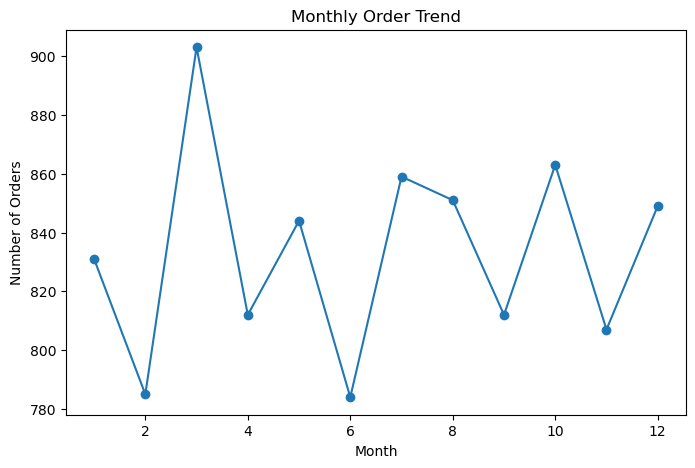

In [72]:
monthly_orders = final_df.groupby(
    final_df['order_date'].dt.month
)['order_id'].count()

plt.figure(figsize=(8,5))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o')
plt.title("Monthly Order Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()
#this is line chart (Trend-focused) 
#we understand the how trends of orders goes on the basis of month

In [25]:
avg_spend_user = final_df.groupby('user_id')['total_amount'].mean()


user_id
1       1289.660000
2        756.412000
3        919.755000
4        935.290000
5       1148.576000
           ...     
2996     511.180000
2997    1062.064000
2998     706.911667
2999     643.890000
3000    1113.315000
Name: total_amount, Length: 2883, dtype: float64

In [24]:
orders_per_user = final_df.groupby('user_id')['order_id'].count()
orders_per_user


user_id
1        1
2       10
3        2
4        4
5        5
        ..
2996     3
2997     5
2998     6
2999     1
3000     2
Name: order_id, Length: 2883, dtype: int64

In [27]:
avg_spend_user = final_df.groupby('user_id')['total_amount'].mean()
avg_spend_user


user_id
1       1289.660000
2        756.412000
3        919.755000
4        935.290000
5       1148.576000
           ...     
2996     511.180000
2997    1062.064000
2998     706.911667
2999     643.890000
3000    1113.315000
Name: total_amount, Length: 2883, dtype: float64

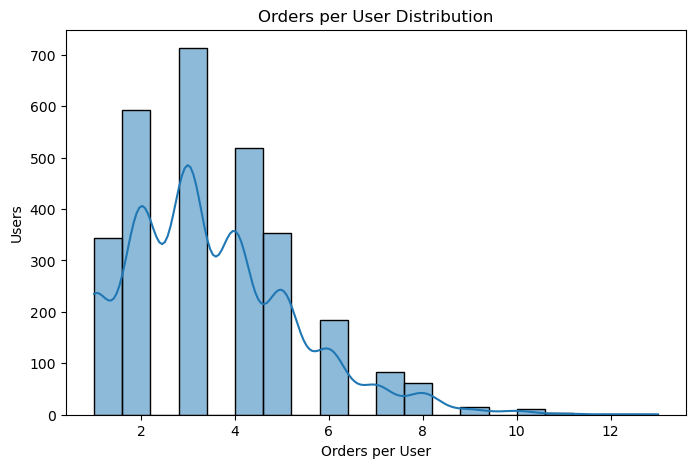

In [75]:
orders_per_user = final_df.groupby('user_id')['order_id'].count()

plt.figure(figsize=(8,5))
sns.histplot(orders_per_user, bins=20, kde=True)
plt.title("Orders per User Distribution")
plt.xlabel("Orders per User")
plt.ylabel("Users")
plt.show()
#this is histogram for user behaviour patterns

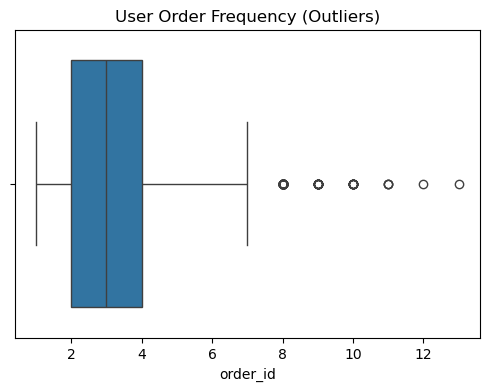

In [76]:
plt.figure(figsize=(6,4))
sns.boxplot(x=orders_per_user)
plt.title("User Order Frequency (Outliers)")
plt.show()
#box plot by which we know the outliers in our dataset 

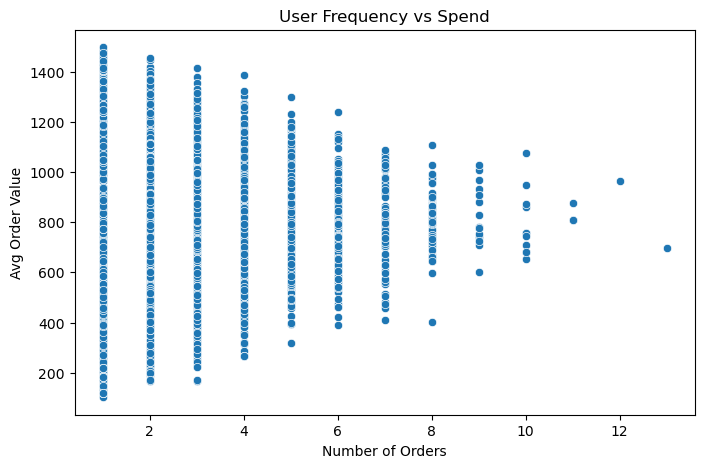

In [77]:
user_stats = final_df.groupby('user_id').agg(
    orders=('order_id', 'count'),
    avg_value=('total_amount', 'mean')
)

plt.figure(figsize=(8,5))
sns.scatterplot(data=user_stats, x='orders', y='avg_value')
plt.title("User Frequency vs Spend")
plt.xlabel("Number of Orders")
plt.ylabel("Avg Order Value")
plt.show()
#scatter plot to know the behaviour pattern by which its easy to visualize the the orders and 
#avg order values.

In [28]:
city_revenue = final_df.groupby('city')['total_amount'].sum()
city_revenue


city
Bangalore    2206946.58
Chennai      1990513.03
Hyderabad    1889366.58
Pune         1924797.93
Name: total_amount, dtype: float64

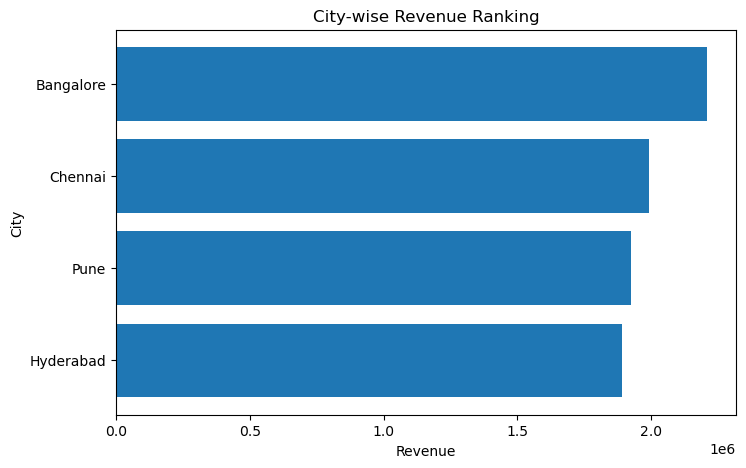

In [78]:
city_revenue = final_df.groupby('city')['total_amount'].sum().sort_values()

plt.figure(figsize=(8,5))
plt.barh(city_revenue.index, city_revenue.values)
plt.title("City-wise Revenue Ranking")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()
#city revenue visualization using horizontal bar 

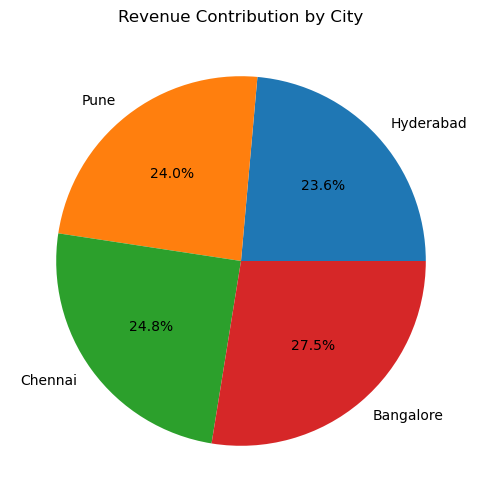

In [79]:
plt.figure(figsize=(6,6))
plt.pie(city_revenue.values, labels=city_revenue.index, autopct='%1.1f%%')
plt.title("Revenue Contribution by City")
plt.show()
#using pie chart better to usderstand the revenue contribution in percentage

In [29]:
cuisine_performance = final_df.groupby('cuisine')['total_amount'].sum()
cuisine_performance


cuisine
Chinese    1930504.65
Indian     1971412.58
Italian    2024203.80
Mexican    2085503.09
Name: total_amount, dtype: float64

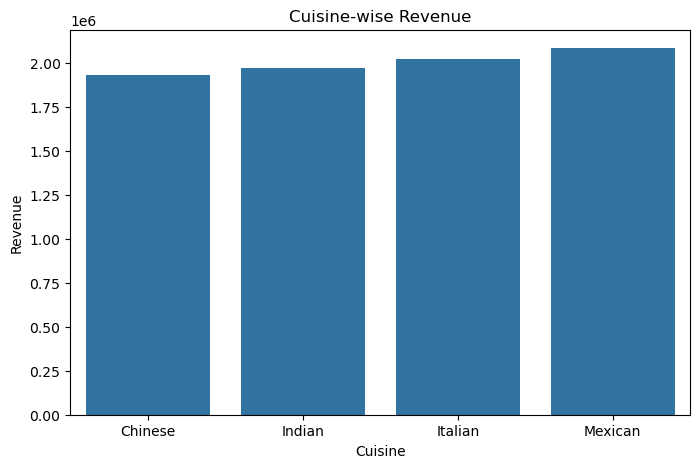

In [80]:
cuisine_revenue = final_df.groupby('cuisine')['total_amount'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_revenue.index, y=cuisine_revenue.values)
plt.title("Cuisine-wise Revenue")
plt.xlabel("Cuisine")
plt.ylabel("Revenue")
plt.show()
#categorical bar (revenue of each category of cuisine )

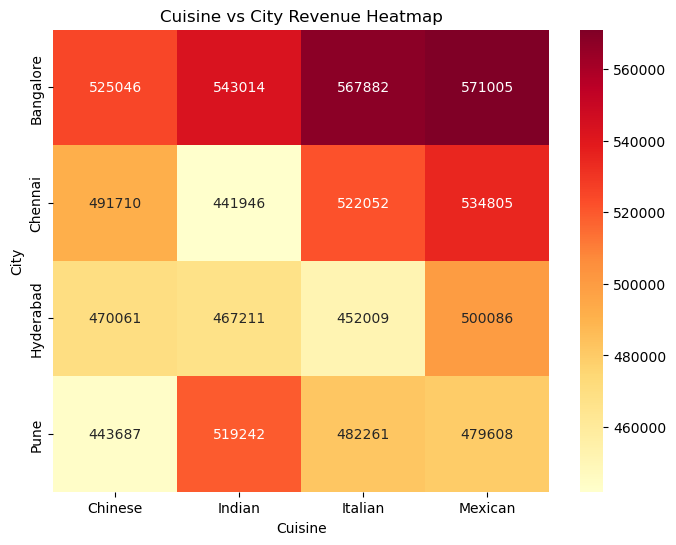

In [88]:
pivot_city_cuisine = final_df.pivot_table(
    values='total_amount',
    index='city',
    columns='cuisine',
    aggfunc='sum'
)

pivot_city_cuisine

plt.figure(figsize=(8,6))
sns.heatmap(
    pivot_city_cuisine,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd"
)

plt.title("Cuisine vs City Revenue Heatmap")
plt.xlabel("Cuisine")
plt.ylabel("City")
plt.show()

#this heat map shows the revenue intensity across city and cuisine
#better to understand in one map

In [30]:
membership_spend = final_df.groupby('membership')['total_amount'].mean()
membership_spend


membership
Gold       797.145556
Regular    805.158434
Name: total_amount, dtype: float64

In [31]:
membership_revenue = final_df.groupby('membership')['total_amount'].sum()
membership_revenue


membership
Gold       3975364.89
Regular    4036259.23
Name: total_amount, dtype: float64

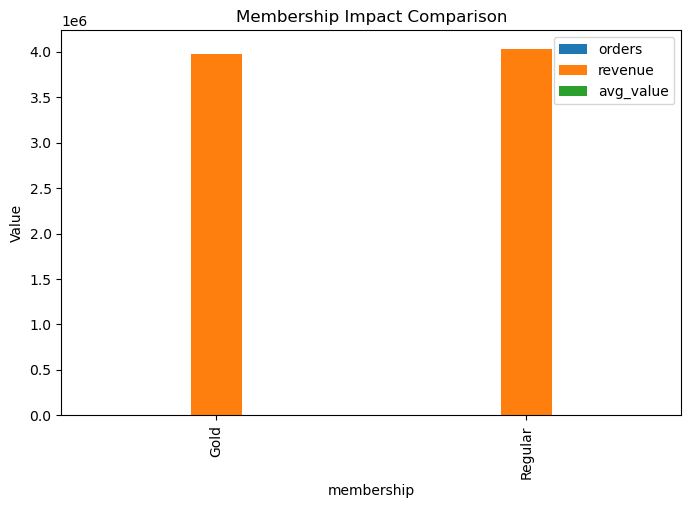

In [81]:
membership_stats = final_df.groupby('membership').agg(
    orders=('order_id', 'count'),
    revenue=('total_amount', 'sum'),
    avg_value=('total_amount', 'mean')
)

membership_stats.plot(kind='bar', figsize=(8,5))
plt.title("Membership Impact Comparison")
plt.ylabel("Value")
plt.show()
#from these below two charts we get to know that who orders more, genrate revenue more and spend more
#this side by side bar chart is used to compare kpis

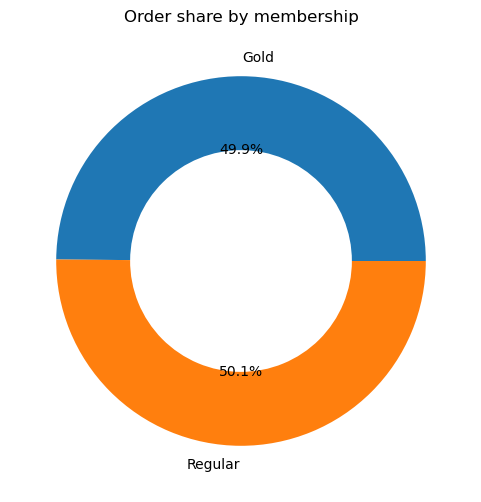

In [83]:
plt.figure(figsize=(6,6))
plt.pie(
    membership_stats['orders'],
    labels=membership_stats.index,
    autopct='%1.1f%%',
    wedgeprops={'width':0.4}
)
plt.title("Order share by membership")
plt.show()
#this donut chart shows us the comparision between these two in percentage

In [32]:
final_df['total_amount'].describe()
#here we know the statistical summary of our final data set
#the count shows the no. of the rows in our dataset
#--ref to the ans of the upcoming question ahead.

count    10000.000000
mean       801.162412
std        405.458753
min        100.200000
25%        446.310000
50%        806.295000
75%       1149.227500
max       1499.830000
Name: total_amount, dtype: float64

In [33]:
final_df.groupby(
    final_df['order_date'].dt.month
)['total_amount'].mean()


order_date
1     797.858315
2     803.652739
3     793.730875
4     820.316724
5     791.977026
6     779.110880
7     801.582596
8     816.671657
9     805.219298
10    810.182769
11    790.300409
12    802.477621
Name: total_amount, dtype: float64

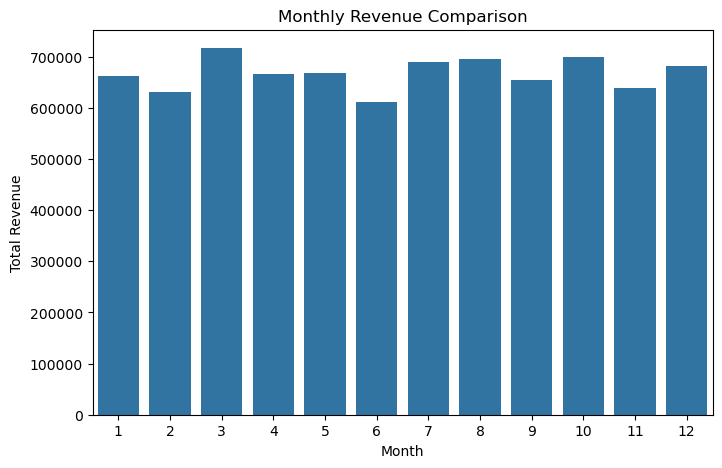

In [73]:
monthly_revenue = final_df.groupby(
    final_df['order_date'].dt.month
)['total_amount'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title("Monthly Revenue Comparison")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


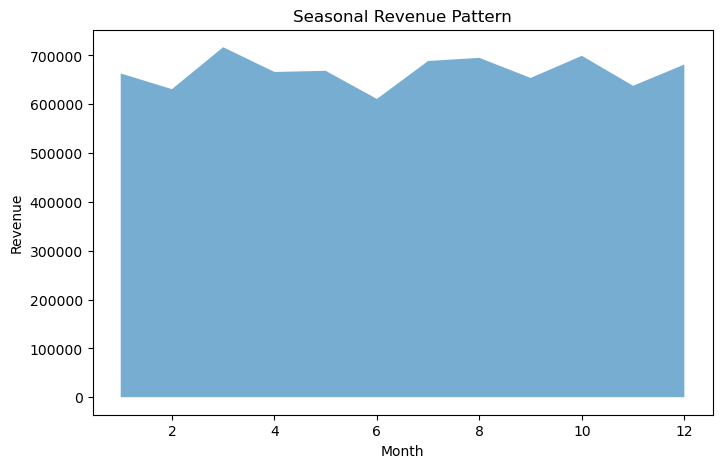

In [74]:
plt.figure(figsize=(8,5))
plt.fill_between(monthly_revenue.index, monthly_revenue.values, alpha=0.6)
plt.title("Seasonal Revenue Pattern")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#Area chart (seasonality)

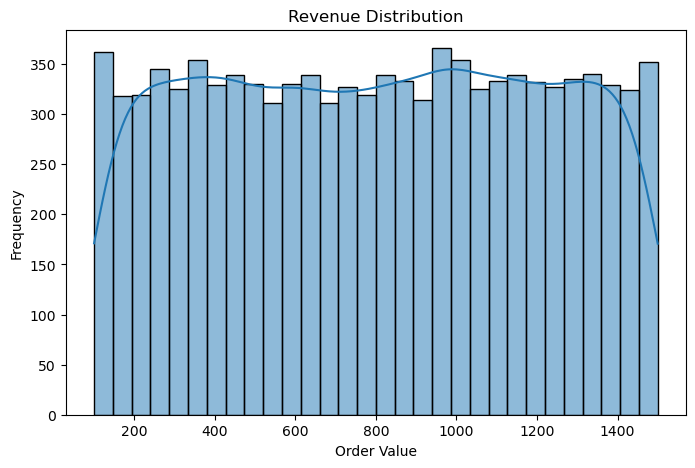

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(final_df['total_amount'], bins=30, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.show()


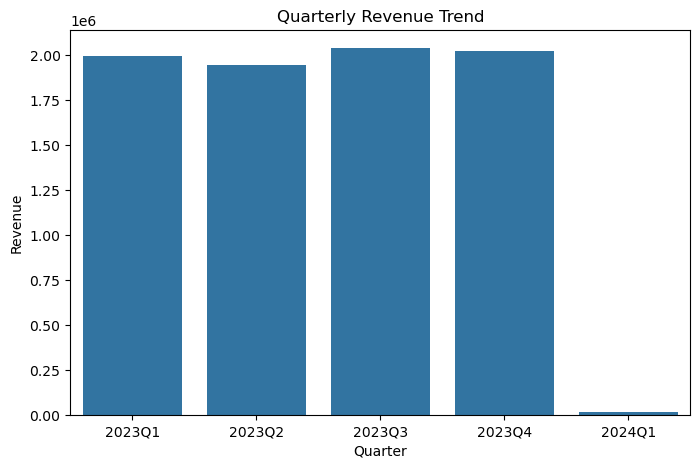

In [85]:
final_df['quarter'] = final_df['order_date'].dt.to_period('Q')

quarterly_revenue = final_df.groupby('quarter')['total_amount'].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=quarterly_revenue.index.astype(str), y=quarterly_revenue.values)
plt.title("Quarterly Revenue Trend")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.show()
#visualization for quartely revenue trend 
#useful for the upcoming question ahead

In [35]:
#Which city has the highest total revenue (total_amount) from Gold members?  
final_df[final_df['membership'] == 'Gold'] \
    .groupby('city')['total_amount'] \
    .sum() \
    .sort_values(ascending=False)
#from this we know that chennai is on top for this

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [36]:
#Which cuisine has the highest average order value across all orders?
Indian
final_df.groupby('cuisine')['total_amount'] \
    .mean() \
    .sort_values(ascending=False)


cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

In [37]:
#How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?
high_value_users = final_df.groupby('user_id')['total_amount'].sum()
(high_value_users > 1000).sum()


2544

In [38]:
#Which restaurant rating range generated the highest total revenue?
final_df['rating_range'] = pd.cut(
    final_df['rating'],
    bins=[3.0, 3.5, 4.0, 4.5, 5.0],
    labels=['3.0–3.5', '3.6–4.0', '4.1–4.5', '4.6–5.0']
)

final_df.groupby('rating_range')['total_amount'] \
    .sum() \
    .sort_values(ascending=False)


C:\Users\adity\AppData\Local\Temp\ipykernel_22864\2729150106.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final_df.groupby('rating_range')['total_amount'] \


rating_range
4.6–5.0    2197030.75
4.1–4.5    1960326.26
3.0–3.5    1881754.57
3.6–4.0    1717494.41
Name: total_amount, dtype: float64

In [89]:
#Among Gold members, which city has the highest average order value?
final_df[final_df['membership'] == 'Gold'] \
    .groupby('city')['total_amount'] \
    .mean() \
    .sort_values(ascending=False)


city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

In [90]:
#Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?
restaurants_per_cuisine = final_df.groupby('cuisine')['restaurant_id'].nunique()
revenue_per_cuisine = final_df.groupby('cuisine')['total_amount'].sum()

pd.concat(
    [restaurants_per_cuisine, revenue_per_cuisine],
    axis=1,
    keys=['restaurant_count', 'total_revenue']
).sort_values('restaurant_count')


,restaurant_count,total_revenue
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


In [91]:
#What percentage of total orders were placed by Gold members? (Rounded to nearest integer)
gold_orders = final_df[final_df['membership'] == 'Gold'].shape[0]
total_orders = final_df.shape[0]

round((gold_orders / total_orders) * 100)


50

In [93]:
#Which restaurant has the highest average order value but less than 20 total orders?
restaurant_stats = final_df.groupby('restaurant_name_x') \
    .agg(
        avg_order_value=('total_amount', 'mean'),
        order_count=('order_id', 'count')
    )

restaurant_stats[restaurant_stats['order_count'] < 20] \
    .sort_values('avg_order_value', ascending=False)
#here we get an issue that we do not find any matching answer in the given options
#my answer is Hotel dhaba multicuisine
#but in options we do not find this so i choose the similar matching one that is Ruchi Mess multicuisine

,avg_order_value,order_count
restaurant_name_x,,
Hotel Dhaba Multicuisine,1040.222308,13
Sri Mess Punjabi,1029.180833,12
Ruchi Biryani Punjabi,1002.140625,16
Sri Delights Pure Veg,989.467222,18
Classic Kitchen Family Restaurant,973.167895,19
...,...,...
Annapurna Tiffins Punjabi,621.828947,19
Darbar Tiffins Non-Veg,596.815556,18
Darbar Restaurant Punjabi,589.972857,14


In [95]:
#Which combination contributes the highest revenue?
final_df.groupby(['membership', 'cuisine'])['total_amount'] \
    .sum() \
    .sort_values(ascending=False)
#here in options there is no regular + mexican option.
#but i choose the gold + italian from the given options because from the given options that is 
#the only combination which contributes the highest revenue

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

In [44]:
#During which quarter of the year is the total revenue highest?
final_df['quarter'] = final_df['order_date'].dt.to_period('Q')

final_df.groupby('quarter')['total_amount'] \
    .sum() \
    .sort_values(ascending=False)


quarter
2023Q3    2037385.10
2023Q4    2018263.66
2023Q1    1993425.14
2023Q2    1945348.72
2024Q1      17201.50
Freq: Q-DEC, Name: total_amount, dtype: float64

In [52]:
#How many total orders were placed by users with Gold membership?
gold_orders = final_df[final_df['membership'] == 'Gold']['order_id'].count()
gold_orders


4987

In [53]:
#What is the total revenue (rounded to nearest integer) generated from orders placed in Hyderabad city?
hyderabad_revenue = final_df[final_df['city'] == 'Hyderabad']['total_amount'].sum()

round(hyderabad_revenue)


1889367

In [54]:
#How many distinct users placed at least one order?
distinct_users = final_df['user_id'].nunique()
distinct_users


2883

In [55]:
#What is the average order value (rounded to 2 decimals) for Gold members?
avg_order_value_gold = final_df[final_df['membership'] == 'Gold']['total_amount'].mean()

round(avg_order_value_gold, 2)


797.15

In [56]:
#How many orders were placed for restaurants with rating ≥ 4.5?
orders_high_rating = final_df[final_df['rating'] >= 4.5]['order_id'].count()
orders_high_rating


3374

In [96]:
#How many orders were placed in the top revenue city among Gold members only?
gold_city_revenue = (
    final_df[final_df['membership'] == 'Gold']
    .groupby('city')['total_amount']
    .sum()
    .sort_values(ascending=False)
)

gold_city_revenue
#here we know that the top revenue city among gold member is chennai as
#we fount using tge groupby function of city and total amount by summing them that is chennai

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

In [59]:
orders_top_gold_city = final_df[
    (final_df['membership'] == 'Gold') &
    (final_df['city'] == top_gold_city)
]['order_id'].count()

orders_top_gold_city
#here we foung the total orders by gold members only in top revenue city

1337

In [ ]:
#the next questions are answered using the transfomations which we had done previously on the given datasets
#wherever neccessary i had commented there with the ---reference
#thank you for providing this opportunity and beliving in me!